In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.set_option('max_columns',None)
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math
sns.set_style("whitegrid")

In [2]:
#Read in the data
df=pd.read_excel(r'C:\Users\HP\Downloads\Credit data (1) (1).xlsx')

In [3]:
# Get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
SeriousDlqin2yrs                        10000 non-null int64
RevolvingUtilizationOfUnsecuredLines    10000 non-null float64
age                                     10000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    10000 non-null int64
DebtRatio                               10000 non-null float64
MonthlyIncome                           8026 non-null float64
NumberOfOpenCreditLinesAndLoans         10000 non-null int64
NumberOfTimes90DaysLate                 10000 non-null int64
NumberRealEstateLoansOrLines            10000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    10000 non-null int64
NumberOfDependents                      9716 non-null float64
dtypes: float64(4), int64(7)
memory usage: 859.5 KB


In [4]:
# Drop the columns where all elements are NaN
df = df.dropna(axis=1, how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
SeriousDlqin2yrs                        10000 non-null int64
RevolvingUtilizationOfUnsecuredLines    10000 non-null float64
age                                     10000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    10000 non-null int64
DebtRatio                               10000 non-null float64
MonthlyIncome                           8026 non-null float64
NumberOfOpenCreditLinesAndLoans         10000 non-null int64
NumberOfTimes90DaysLate                 10000 non-null int64
NumberRealEstateLoansOrLines            10000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    10000 non-null int64
NumberOfDependents                      9716 non-null float64
dtypes: float64(4), int64(7)
memory usage: 859.5 KB


In [5]:
# Show columns that have more than 70% missing values
missvals = df.isnull().mean()
missvals[missvals>0.7]

Series([], dtype: float64)

In [6]:
df.columns.values

array(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object)

In [7]:
# Drop all missing values
df.dropna(inplace=True)

In [8]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [9]:
df.shape

(8026, 11)

In [10]:
df['SeriousDlqin2yrs']

0       1
1       0
2       0
3       0
4       0
5       0
7       0
9       0
10      0
11      0
12      0
13      1
14      0
15      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
30      0
31      0
33      0
       ..
9957    0
9958    0
9959    1
9960    0
9961    0
9962    0
9963    0
9965    0
9966    1
9967    0
9969    0
9970    0
9971    0
9972    0
9974    0
9977    0
9978    0
9981    0
9983    1
9984    0
9985    0
9987    0
9988    0
9989    0
9991    0
9992    0
9993    0
9994    0
9998    0
9999    0
Name: SeriousDlqin2yrs, Length: 8026, dtype: int64

In [11]:
df['SeriousDlqin2yrs'].value_counts()

0    7509
1     517
Name: SeriousDlqin2yrs, dtype: int64

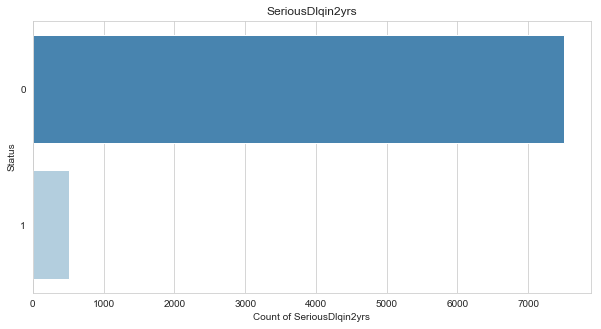

In [12]:
# Create bar plot
plt.figure(figsize=(10,5))
sns.countplot(y='SeriousDlqin2yrs', data=df, order = df['SeriousDlqin2yrs'].value_counts().index, palette='Blues_r')

# Add the aesthetics
plt.title('SeriousDlqin2yrs')
plt.xlabel('Count of SeriousDlqin2yrs')
plt.ylabel('Status')

# Show the plot
plt.show()

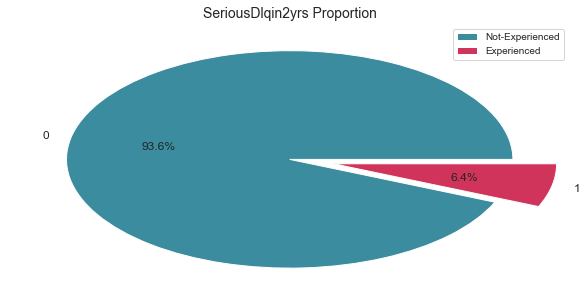

In [13]:
# SeriousDlqnin2yrs proportion
plt.figure(figsize=(10,5))

status = df['SeriousDlqin2yrs'].value_counts()
labels = df['SeriousDlqin2yrs'].value_counts().index
explode = [0,0.2]
colors = ['#3a8c9e','#d1345b']

plt.title('SeriousDlqin2yrs Proportion', fontsize=14)
plt.pie(status, labels=labels, explode=explode, colors=colors,
        autopct='%.1f%%', textprops={'fontsize':12})
L = plt.legend()
L.get_texts()[0].set_text('Not-Experienced')
L.get_texts()[1].set_text('Experienced')
plt.show() 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

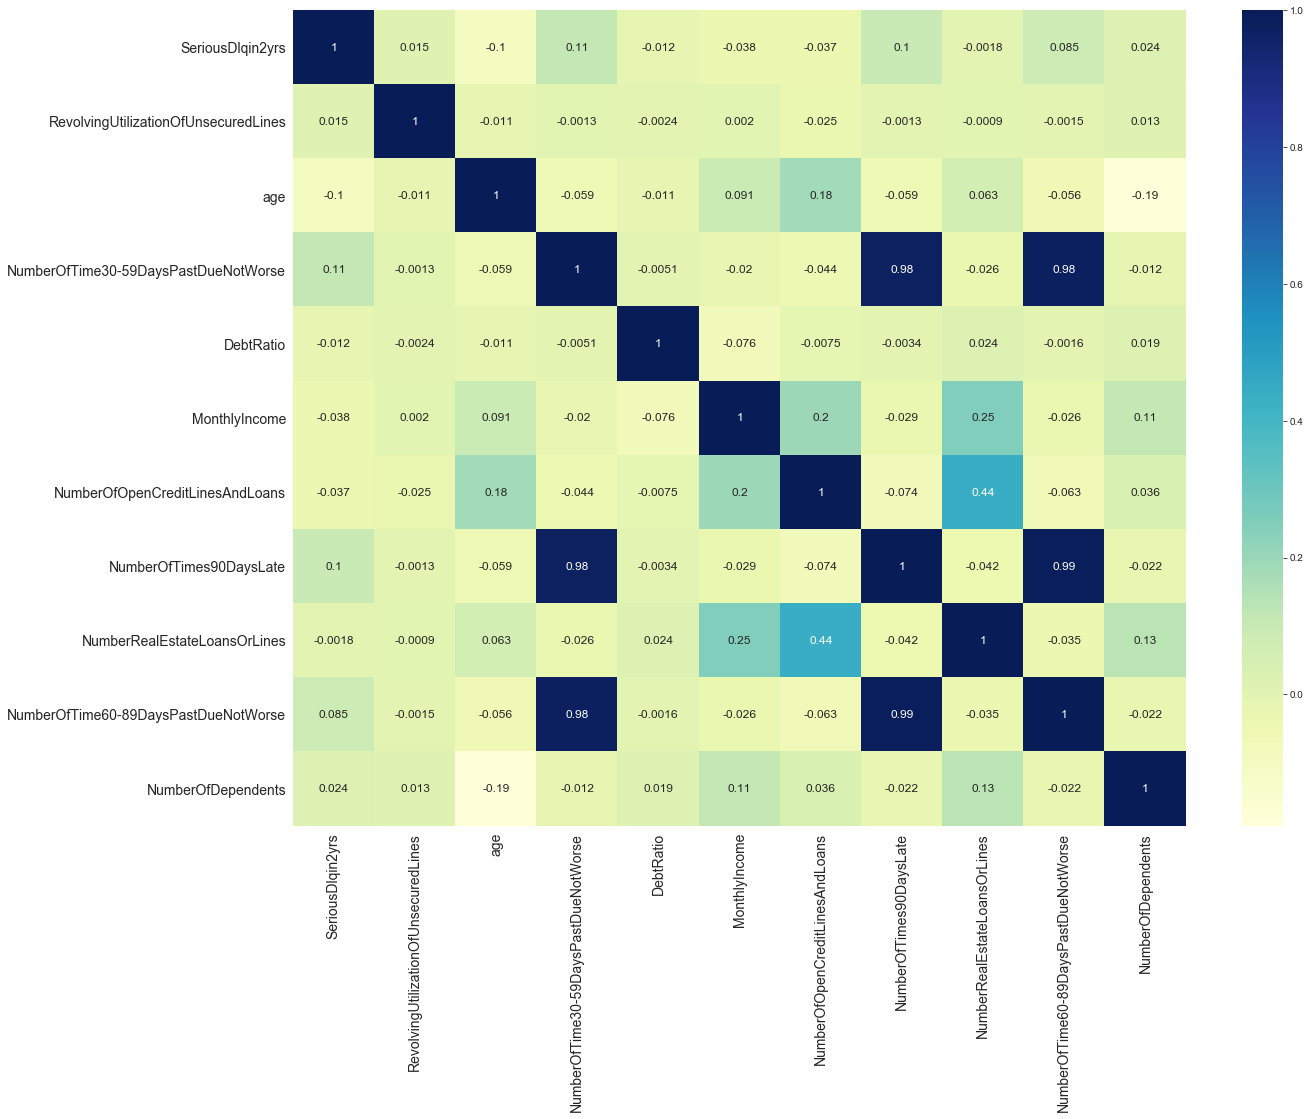

In [14]:
# Correlation matrix
corr_matrix = df.corr()
heatMap = sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", annot_kws={'size':12})
heatmap = plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [15]:
# Numerical data summary statistics
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000
mean,0.064416,5.943767,51.173187,0.386369,27.286629,6606.379143,8.694119,0.216048,1.048343,0.189758,0.836282
std,0.245507,178.750906,14.338616,3.526471,347.006462,6787.373041,5.097432,3.485142,1.105367,3.470499,1.162920
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035781,40.000000,0.000000,0.142853,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.185988,51.000000,0.000000,0.296673,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.584135,61.000000,0.000000,0.484544,8200.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,9340.000000,98.000000,98.000000,15466.000000,208333.000000,46.000000,98.000000,17.000000,98.000000,20.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8026 entries, 0 to 9999
Data columns (total 11 columns):
SeriousDlqin2yrs                        8026 non-null int64
RevolvingUtilizationOfUnsecuredLines    8026 non-null float64
age                                     8026 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    8026 non-null int64
DebtRatio                               8026 non-null float64
MonthlyIncome                           8026 non-null float64
NumberOfOpenCreditLinesAndLoans         8026 non-null int64
NumberOfTimes90DaysLate                 8026 non-null int64
NumberRealEstateLoansOrLines            8026 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    8026 non-null int64
NumberOfDependents                      8026 non-null float64
dtypes: float64(4), int64(7)
memory usage: 1.0 MB


In [17]:
# Check missing values again 
missing_values = df.isnull().sum()
missing_values[missing_values>0]/len(df)

Series([], dtype: float64)

In [19]:
# Separate categorical features from numerical
categorical_features = df.select_dtypes(exclude='number')
numerical_features = df.select_dtypes(exclude='object')

In [20]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8026 entries, 0 to 9999
Empty DataFrame

In [21]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8026 entries, 0 to 9999
Data columns (total 11 columns):
SeriousDlqin2yrs                        8026 non-null int64
RevolvingUtilizationOfUnsecuredLines    8026 non-null float64
age                                     8026 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    8026 non-null int64
DebtRatio                               8026 non-null float64
MonthlyIncome                           8026 non-null float64
NumberOfOpenCreditLinesAndLoans         8026 non-null int64
NumberOfTimes90DaysLate                 8026 non-null int64
NumberRealEstateLoansOrLines            8026 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    8026 non-null int64
NumberOfDependents                      8026 non-null float64
dtypes: float64(4), int64(7)
memory usage: 1.0 MB


In [22]:
filled_data = df

In [23]:
preprocess_data = df

In [24]:
# Check for any missing values
missing = preprocess_data.isnull().sum()
missing[missing>0] 

Series([], dtype: int64)

In [25]:
# Create function to calculate weight of evidence and information value

def iv_woe(data, target, bins=10, show_woe=False):
    
    # Empty dataframe
    newDF, woeDF = pd.DataFrame(), pd.DataFrame()
    
    # Extract column names
    cols = data.columns
    
    # Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        # Show WOE table
        if show_woe == True:
            print(d)
    return newDF, woeDF
iv, woe = iv_woe(preprocess_data, target='SeriousDlqin2yrs', bins=20)

Information value of RevolvingUtilizationOfUnsecuredLines is 1.060517
Information value of age is 0.268195
Information value of NumberOfTime30-59DaysPastDueNotWorse is 0.417966
Information value of DebtRatio is 0.109305
Information value of MonthlyIncome is 0.165934
Information value of NumberOfOpenCreditLinesAndLoans is 0.068129
Information value of NumberOfTimes90DaysLate is 0.718539
Information value of NumberRealEstateLoansOrLines is 0.019739
Information value of NumberOfTime60-89DaysPastDueNotWorse is 0.580836
Information value of NumberOfDependents is 0.046247


In [26]:
print(iv)

                               Variable        IV
0  RevolvingUtilizationOfUnsecuredLines  1.060517
0                                   age  0.268195
0  NumberOfTime30-59DaysPastDueNotWorse  0.417966
0                             DebtRatio  0.109305
0                         MonthlyIncome  0.165934
0       NumberOfOpenCreditLinesAndLoans  0.068129
0               NumberOfTimes90DaysLate  0.718539
0          NumberRealEstateLoansOrLines  0.019739
0  NumberOfTime60-89DaysPastDueNotWorse  0.580836
0                    NumberOfDependents  0.046247


In [27]:
preprocess_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [28]:
# Create function to calculate weight of evidence of categorical features

def woe_categorical(df, cat_feature, SeriousDlqin2yrs_df):
    df = pd.concat([df[cat_feature], SeriousDlqin2yrs_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_Not-Experienced']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_Not-Experienced'] = df['prop_Not-Experienced'] * df['n_obs']
    df['n_Experienced'] = (1 - df['prop_Not-Experienced']) * df['n_obs']
    df['prop_n_Not-Experienced'] = df['n_Not-Experienced'] / df['n_Not-Experienced'].sum()
    df['prop_n_Experienced'] = df['n_Experienced'] / df['n_Experienced'].sum()
    df['WoE'] = np.log(df['prop_n_Not-Experienced'] / df['prop_n_Experienced'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_Not-Experienced'] = df['prop_Not-Experienced'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_Not-Experienced'] - df['prop_n_Experienced']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Create function to plot weight of evidence values 
# Below we define a function for plotting WoE across categories that takes 2 arguments: a dataframe and a number
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels) 

In [29]:
# Separate data into target and features
X = preprocess_data.drop(columns='SeriousDlqin2yrs', axis=1)
y = preprocess_data['SeriousDlqin2yrs']

In [30]:
# Create function to calculate weight of evidence of numerical features
def woe_continous(df, cat_feature, SeriousDlqin2yrs_df):
    df = pd.concat([df[cat_feature], SeriousDlqin2yrs_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_Not-Experienced']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_Not-Experienced'] = df['prop_Not-Experienced'] * df['n_obs']
    df['n_Experienced'] = (1 - df['prop_Not-Experienced']) * df['n_obs']
    df['prop_n_Not-Experienced'] = df['n_Not-Experienced'] / df['n_Not-Experienced'].sum()
    df['prop_n_Experienced'] = df['n_Experienced'] / df['n_Experienced'].sum()
    df['WoE'] = np.log(df['prop_n_Not-Experienced'] / df['prop_n_Experienced'])
# df = df.sort_values(['WoE'])
# df = df.reset_index(drop = True)
    df['diff_prop_Not-Experienced'] = df['prop_Not-Experienced'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_Not-Experienced'] - df['prop_n_Experienced']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [31]:
# Analyze age below 100
X_train_prepr_temp = X[X['age'] <= 100].copy()
# Fine-classing again
X_train_prepr_temp['age_factor'] = pd.cut(X_train_prepr_temp['age'], 10)
# Make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'age_factor', y[X_train_prepr_temp.index])
df_temp

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


,age_factor,n_obs,prop_Not-Experienced,prop_n_obs,n_Not-Experienced,n_Experienced,prop_n_Not-Experienced,prop_n_Experienced,WoE,diff_prop_Not-Experienced,diff_WoE,IV
0,"(20.923, 28.7]",380,0.139474,0.047346,53.0,327.0,0.102515,0.043548,0.856146,NaN,NaN,inf
1,"(28.7, 36.4]",981,0.087666,0.122228,86.0,895.0,0.166344,0.119190,0.333338,0.051808,0.522808,inf
2,"(36.4, 44.1]",1394,0.071736,0.173686,100.0,1294.0,0.193424,0.172327,0.115491,0.015930,0.217847,inf
3,"(44.1, 51.8]",1435,0.078746,0.178794,113.0,1322.0,0.218569,0.176055,0.216302,0.007010,0.100810,inf
4,"(51.8, 59.5]",1534,0.059322,0.191129,91.0,1443.0,0.176015,0.192169,-0.087805,0.019424,0.304107,inf
5,"(59.5, 67.2]",1234,0.041329,0.153750,51.0,1183.0,0.098646,0.157544,-0.468169,0.017993,0.380363,inf
6,"(67.2, 74.9]",550,0.023636,0.068527,13.0,537.0,0.025145,0.071514,-1.045234,0.017693,0.577066,inf
7,"(74.9, 82.6]",380,0.023684,0.047346,9.0,371.0,0.017408,0.049407,-1.043163,0.000048,0.002071,inf
8,"(82.6, 90.3]",117,0.008547,0.014578,1.0,116.0,0.001934,0.015448,-2.077775,0.015137,1.034613,inf
9,"(90.3, 98.0]",21,0.000000,0.002616,0.0,21.0,0.000000,0.002797,-inf,0.008547,inf,inf


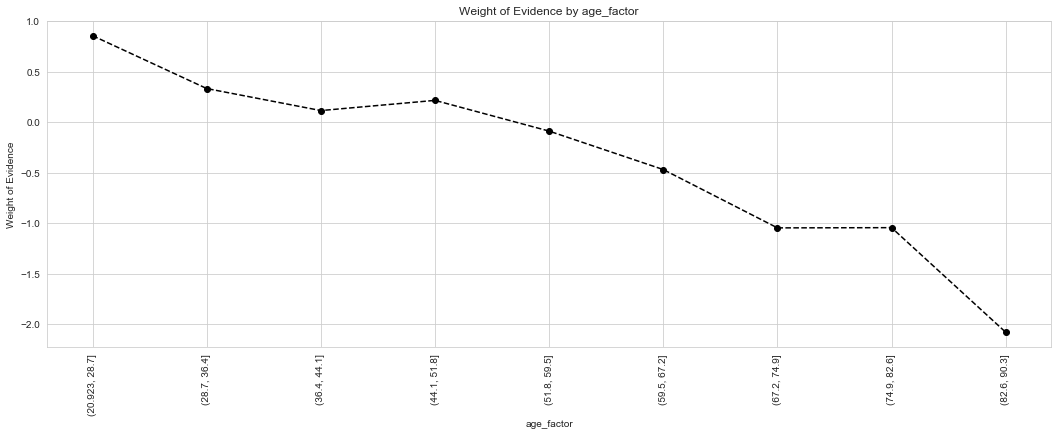

In [32]:
plot_by_woe(df_temp, 90)

In [33]:
# Analyze NumberOfTime30-59DaysPastDueNotWorse below 59
X_train_prepr_temp = X[X['NumberOfTime30-59DaysPastDueNotWorse'] <= 59].copy()
# Fine-classing again
X_train_prepr_temp['NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(X_train_prepr_temp['age'], 30)
# Make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'NumberOfTime30-59DaysPastDueNotWorse', y[X_train_prepr_temp.index])
df_temp

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,NumberOfTime30-59DaysPastDueNotWorse,n_obs,prop_Not-Experienced,prop_n_obs,n_Not-Experienced,n_Experienced,prop_n_Not-Experienced,prop_n_Experienced,WoE,diff_prop_Not-Experienced,diff_WoE,IV
0,"(20.923, 23.567]",51,0.019608,0.006362,1.0,50.0,0.001953,0.006663,-1.227156,NaN,NaN,inf
1,"(23.567, 26.133]",153,0.150327,0.019087,23.0,130.0,0.044922,0.017324,0.952827,0.130719,2.179983,inf
2,"(26.133, 28.7]",170,0.158824,0.021208,27.0,143.0,0.052734,0.019057,1.017859,0.008497,0.065032,inf
3,"(28.7, 31.267]",322,0.105590,0.040170,34.0,288.0,0.066406,0.038380,0.548267,0.053233,0.469592,inf
4,"(31.267, 33.833]",250,0.088000,0.031188,22.0,228.0,0.042969,0.030384,0.346564,0.017590,0.201703,inf
5,"(33.833, 36.4]",407,0.071253,0.050773,29.0,378.0,0.056641,0.050373,0.117269,0.016747,0.229295,inf
6,"(36.4, 38.967]",302,0.059603,0.037675,18.0,284.0,0.035156,0.037846,-0.073736,0.011650,0.191004,inf
7,"(38.967, 41.533]",561,0.081996,0.069985,46.0,515.0,0.089844,0.068630,0.269341,0.022394,0.343077,inf
8,"(41.533, 44.1]",531,0.067797,0.066243,36.0,495.0,0.070312,0.065965,0.063828,0.014200,0.205513,inf
9,"(44.1, 46.667]",427,0.088993,0.053268,38.0,389.0,0.074219,0.051839,0.358874,0.021196,0.295046,inf


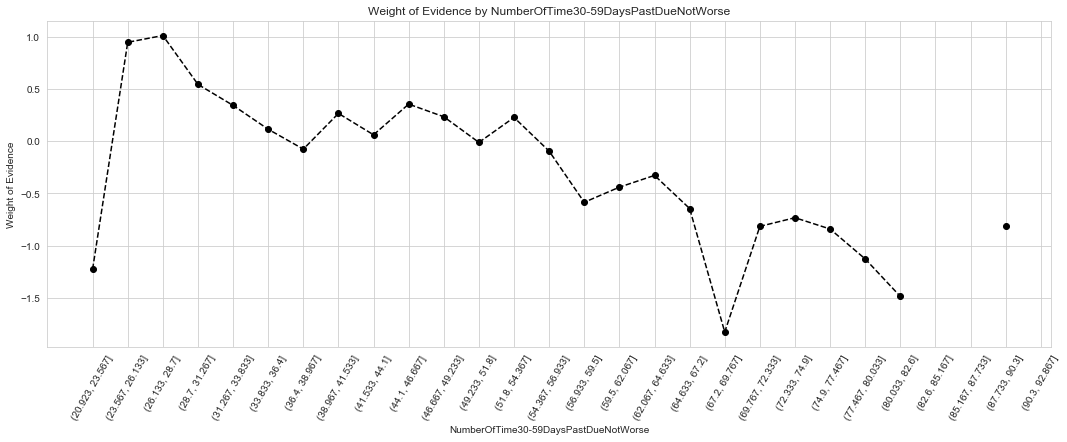

In [34]:
plot_by_woe(df_temp, 60)

In [35]:
# Monthly Income is continuous
# Analyze income below 150000
X_train_prepr_temp = X[X['MonthlyIncome'] <= 150000].copy()
# Fine-classing again
X_train_prepr_temp['MonthlyIncome_factor'] = pd.cut(X_train_prepr_temp['MonthlyIncome'], 10)
# Make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'MonthlyIncome_factor', y[X_train_prepr_temp.index])
df_temp

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,MonthlyIncome_factor,n_obs,prop_Not-Experienced,prop_n_obs,n_Not-Experienced,n_Experienced,prop_n_Not-Experienced,prop_n_Experienced,WoE,diff_prop_Not-Experienced,diff_WoE,IV
0,"(-142.0, 14200.0]",7608,0.065457,0.948156,498.0,7110.0,0.963250,0.947116,0.016891,NaN,NaN,inf
1,"(14200.0, 28400.0]",358,0.044693,0.044616,16.0,342.0,0.030948,0.045557,-0.386674,0.020765,0.403565,inf
2,"(28400.0, 42600.0]",23,0.043478,0.002866,1.0,22.0,0.001934,0.002931,-0.415494,0.001214,0.028820,inf
3,"(42600.0, 56800.0]",11,0.000000,0.001371,0.0,11.0,0.000000,0.001465,-inf,0.043478,inf,inf
4,"(56800.0, 71000.0]",14,0.000000,0.001745,0.0,14.0,0.000000,0.001865,-inf,0.000000,NaN,inf
5,"(71000.0, 85200.0]",6,0.333333,0.000748,2.0,4.0,0.003868,0.000533,1.982401,0.333333,inf,inf
6,"(85200.0, 99400.0]",2,0.000000,0.000249,0.0,2.0,0.000000,0.000266,-inf,0.333333,inf,inf
7,"(99400.0, 113600.0]",1,0.000000,0.000125,0.0,1.0,0.000000,0.000133,-inf,0.000000,NaN,inf
8,"(113600.0, 127800.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(127800.0, 142000.0]",1,0.000000,0.000125,0.0,1.0,0.000000,0.000133,-inf,NaN,NaN,inf


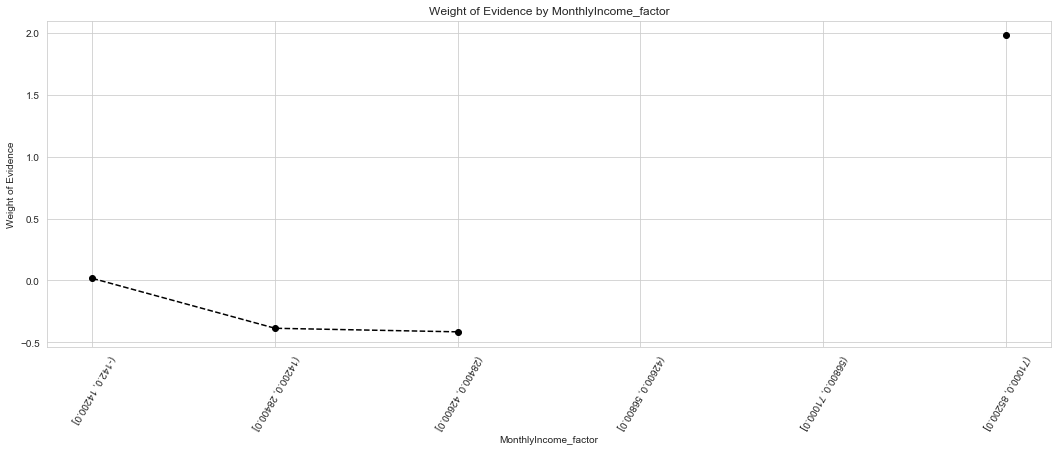

In [36]:
plot_by_woe(df_temp, 15000)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


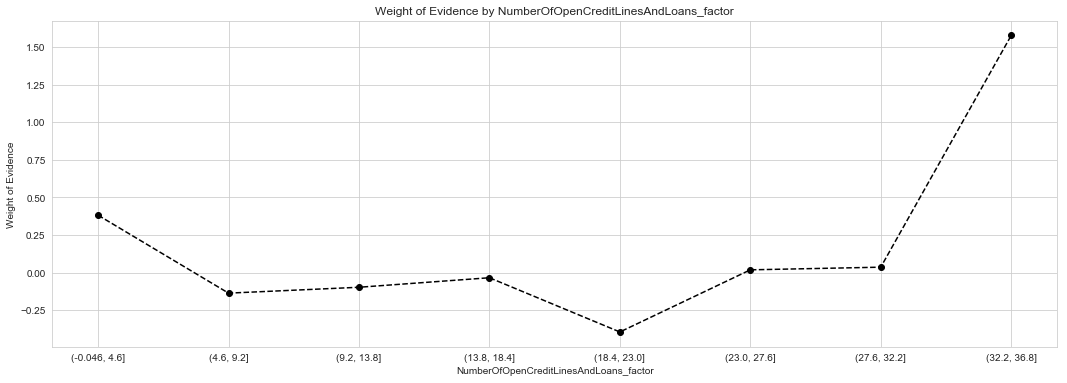

In [37]:
# NumberOfOpenCreditLinesAndLoans is continuous
X['NumberOfOpenCreditLinesAndLoans_factor'] = pd.cut(X['NumberOfOpenCreditLinesAndLoans'], 10)
plot_by_woe(woe_continous(X,'NumberOfOpenCreditLinesAndLoans_factor', y))

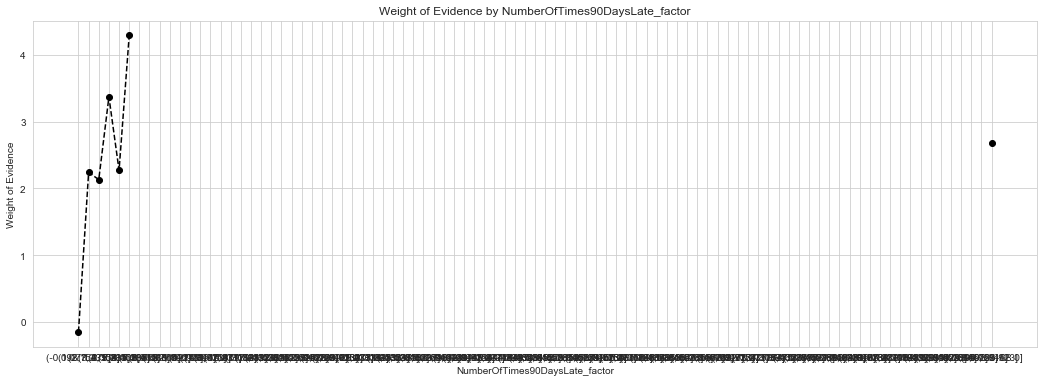

In [38]:
# Analyze NumberOfTimes90DaysLate 
# The  NumberOfTimes90DaysLate is continuous
X['NumberOfTimes90DaysLate_factor'] = pd.cut(X['NumberOfTimes90DaysLate'], 91)
plot_by_woe(woe_continous(X,'NumberOfTimes90DaysLate_factor', y))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


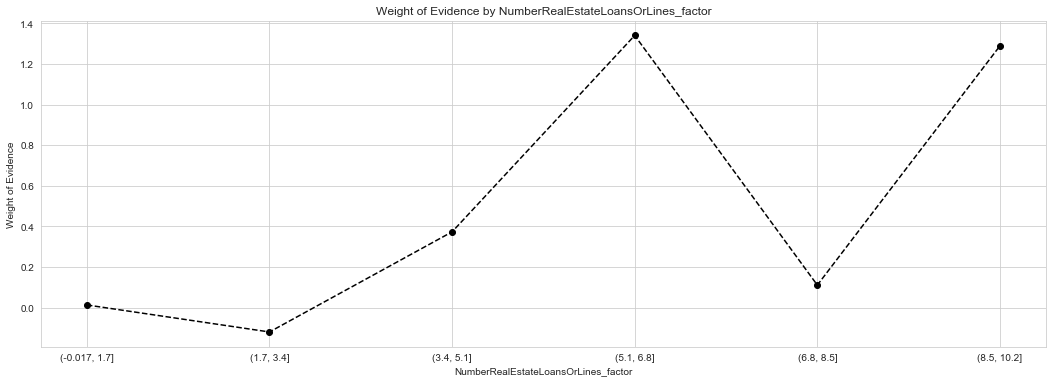

In [39]:
# NumberRealEstateLoansOrLines is continuous
X['NumberRealEstateLoansOrLines_factor'] = pd.cut(X['NumberRealEstateLoansOrLines'], 10)
plot_by_woe(woe_continous(X,'NumberRealEstateLoansOrLines_factor', y))

In [40]:
# NumberOfTime60-89DaysPastDueNotWorse
X_train_prepr_temp = X[X['NumberOfTime60-89DaysPastDueNotWorse'] <= 89].copy()
# Fine-classing again
X_train_prepr_temp['NumberOfTime60-89DaysPastDueNotWorse_factor'] = pd.cut(X_train_prepr_temp['NumberOfTime60-89DaysPastDueNotWorse'], 10)
# Make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'NumberOfTime60-89DaysPastDueNotWorse_factor', y[X_train_prepr_temp.index])
df_temp

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


,NumberOfTime60-89DaysPastDueNotWorse_factor,n_obs,prop_Not-Experienced,prop_n_obs,n_Not-Experienced,n_Experienced,prop_n_Not-Experienced,prop_n_Experienced,WoE,diff_prop_Not-Experienced,diff_WoE,IV
0,"(-0.006, 0.6]",7596,0.048710,0.947605,370.0,7226.0,0.722656,0.962953,-0.287071,NaN,NaN,inf
1,"(0.6, 1.2]",335,0.328358,0.041791,110.0,225.0,0.214844,0.029984,1.969247,0.279648,2.256318,inf
2,"(1.2, 1.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(1.8, 2.4]",61,0.377049,0.007610,23.0,38.0,0.044922,0.005064,2.182775,NaN,NaN,inf
4,"(2.4, 3.0]",15,0.400000,0.001871,6.0,9.0,0.011719,0.001199,2.279402,0.022951,0.096627,inf
5,"(3.0, 3.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(3.6, 4.2]",5,0.200000,0.000624,1.0,4.0,0.001953,0.000533,1.298573,NaN,NaN,inf
7,"(4.2, 4.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(4.8, 5.4]",3,0.666667,0.000374,2.0,1.0,0.003906,0.000133,3.378014,NaN,NaN,inf
9,"(5.4, 6.0]",1,0.000000,0.000125,0.0,1.0,0.000000,0.000133,-inf,0.666667,inf,inf


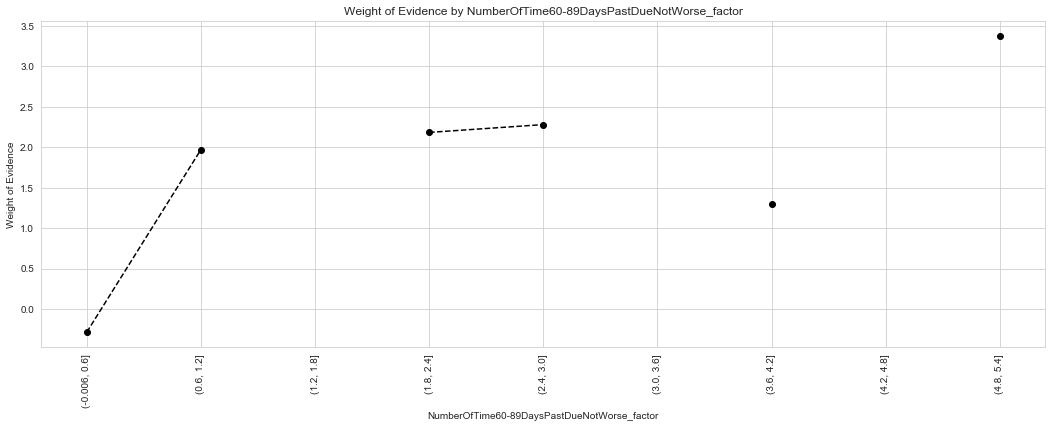

In [41]:
plot_by_woe(df_temp, 90)

In [42]:
# NumberOfTime30-59DaysPastDueNotWorse
X_train_prepr_temp = X[X['NumberOfTime30-59DaysPastDueNotWorse'] <= 59].copy()
# Fine-classing again
X_train_prepr_temp['NumberOfTime30-59DaysPastDueNotWorse_factor'] = pd.cut(X_train_prepr_temp['NumberOfTime30-59DaysPastDueNotWorse'], 10)
# Make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'NumberOfTime30-59DaysPastDueNotWorse_factor', y[X_train_prepr_temp.index])
df_temp

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,NumberOfTime30-59DaysPastDueNotWorse_factor,n_obs,prop_Not-Experienced,prop_n_obs,n_Not-Experienced,n_Experienced,prop_n_Not-Experienced,prop_n_Experienced,WoE,diff_prop_Not-Experienced,diff_WoE,IV
0,"(-0.012, 1.2]",7585,0.051417,0.946233,390.0,7195.0,0.761719,0.958822,-0.230128,NaN,NaN,inf
1,"(1.2, 2.4]",239,0.242678,0.029815,58.0,181.0,0.113281,0.024120,1.546813,0.191261,1.776941,inf
2,"(2.4, 3.6]",119,0.344538,0.014845,41.0,78.0,0.080078,0.010394,2.041730,0.101860,0.494917,inf
3,"(3.6, 4.8]",37,0.216216,0.004616,8.0,29.0,0.015625,0.003865,1.397013,0.128322,0.644718,inf
4,"(4.8, 6.0]",27,0.296296,0.003368,8.0,19.0,0.015625,0.002532,1.819869,0.080080,0.422857,inf
5,"(6.0, 7.2]",6,0.666667,0.000749,4.0,2.0,0.007812,0.000267,3.378014,0.370370,1.558145,inf
6,"(7.2, 8.4]",1,1.000000,0.000125,1.0,0.0,0.001953,0.000000,inf,0.333333,inf,inf
7,"(8.4, 9.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(9.6, 10.8]",1,1.000000,0.000125,1.0,0.0,0.001953,0.000000,inf,NaN,NaN,inf
9,"(10.8, 12.0]",1,1.000000,0.000125,1.0,0.0,0.001953,0.000000,inf,0.000000,NaN,inf


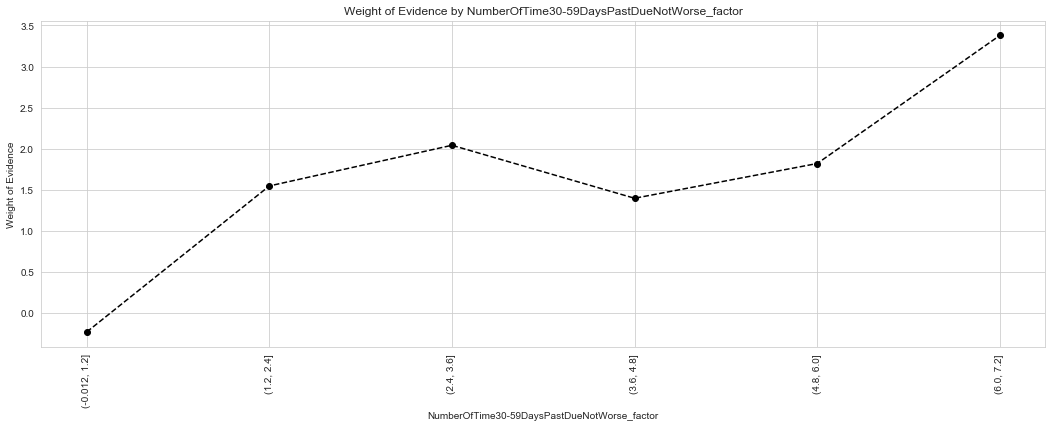

In [43]:
plot_by_woe(df_temp, 90)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


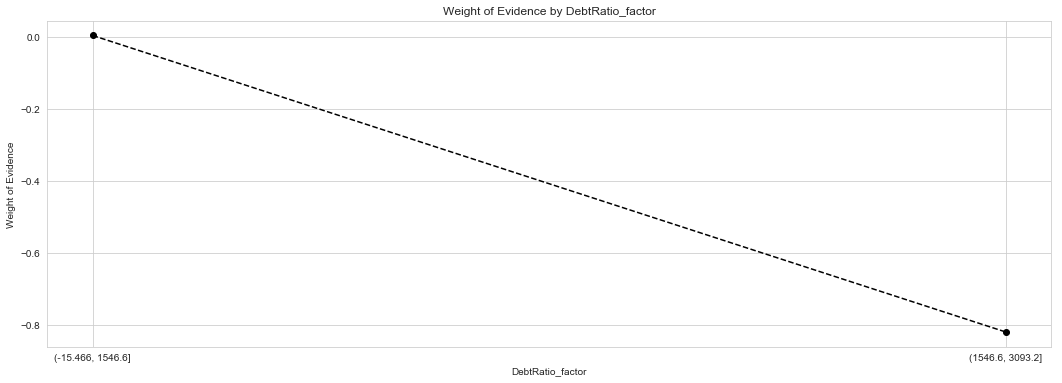

In [44]:
# DebtRatio is continuous
X['DebtRatio_factor'] = pd.cut(X['DebtRatio'], 10)
plot_by_woe(woe_continous(X,'DebtRatio_factor', y))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


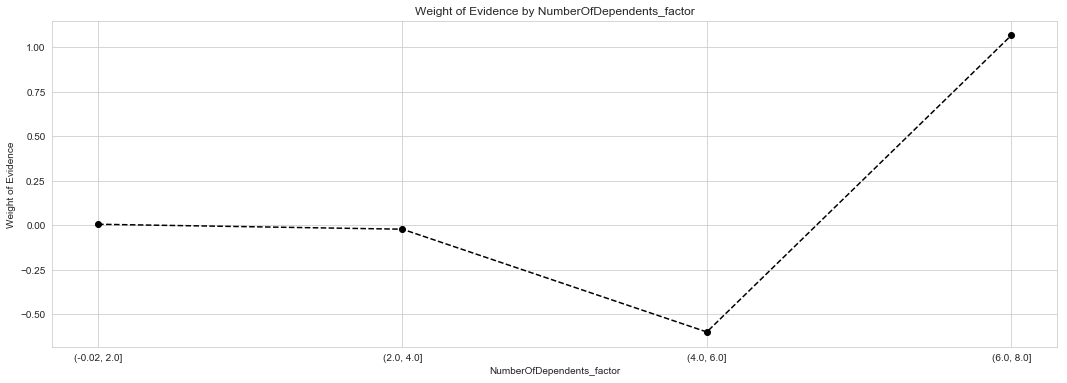

In [45]:
# NumberOfDependents is continuous
X['NumberOfDependents_factor'] = pd.cut(X['NumberOfDependents'], 10)
plot_by_woe(woe_continous(X,'NumberOfDependents_factor', y))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


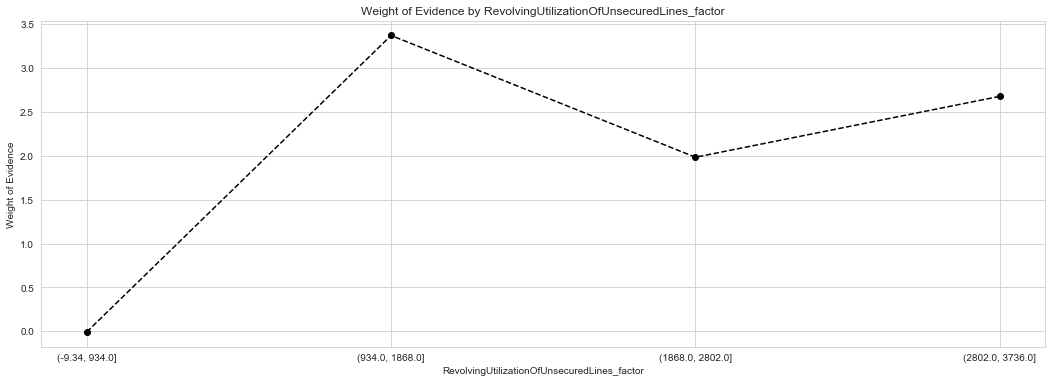

In [46]:
# RevolvingUtilizationOfUnsecuredLines is continuous
X['RevolvingUtilizationOfUnsecuredLines_factor'] = pd.cut(X['RevolvingUtilizationOfUnsecuredLines'], 10)
plot_by_woe(woe_continous(X,'RevolvingUtilizationOfUnsecuredLines_factor', y))

In [47]:
# we will use these features
list_features = ['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
len(list_features)

10

In [48]:
preprocess_data[list_features].nunique()

RevolvingUtilizationOfUnsecuredLines    6975
age                                       77
NumberOfTime30-59DaysPastDueNotWorse      12
DebtRatio                               7811
MonthlyIncome                           3149
NumberOfOpenCreditLinesAndLoans           38
NumberOfTimes90DaysLate                   10
NumberRealEstateLoansOrLines              14
NumberOfTime60-89DaysPastDueNotWorse       8
NumberOfDependents                        10
dtype: int64

In [49]:
df_encoding = preprocess_data[list_features].copy()
df_target = preprocess_data['SeriousDlqin2yrs']
#df_encoding = data[list_features].copy()

In [50]:
# Create new features

# RevolvingUtilizationOfUnsecuredLines
df_encoding['RevolvingUtilizationOfUnsecuredLines:<0.03'] = np.where((preprocess_data['RevolvingUtilizationOfUnsecuredLines'] <= 0.03), 1, 0)
df_encoding['RevolvingUtilizationOfUnsecuredLines:0.03-0.06'] = np.where((preprocess_data['RevolvingUtilizationOfUnsecuredLines'] > 0.03) & (preprocess_data['RevolvingUtilizationOfUnsecuredLines'] <= 0.06), 1, 0)
df_encoding['RevolvingUtilizationOfUnsecuredLines:0.06-0.09'] = np.where((preprocess_data['RevolvingUtilizationOfUnsecuredLines'] > 0.06) & (preprocess_data['RevolvingUtilizationOfUnsecuredLines'] <= 0.09), 1, 0)
df_encoding['RevolvingUtilizationOfUnsecuredLines:0.09-0.12'] = np.where((preprocess_data['RevolvingUtilizationOfUnsecuredLines'] > 0.09) & (preprocess_data['RevolvingUtilizationOfUnsecuredLines'] <= 0.12), 1, 0)
df_encoding['RevolvingUtilizationOfUnsecuredLines:0.12-0.15'] = np.where((preprocess_data['RevolvingUtilizationOfUnsecuredLines'] > 0.12) & (preprocess_data['RevolvingUtilizationOfUnsecuredLines'] <= 0.15), 1, 0)
df_encoding['RevolvingUtilizationOfUnsecuredLines:0.15-0.3'] = np.where((preprocess_data['RevolvingUtilizationOfUnsecuredLines'] > 0.15) & (preprocess_data['RevolvingUtilizationOfUnsecuredLines'] <= 0.3), 1, 0)
df_encoding['RevolvingUtilizationOfUnsecuredLines:0.3-0.6'] = np.where((preprocess_data['RevolvingUtilizationOfUnsecuredLines'] > 0.3) & (preprocess_data['RevolvingUtilizationOfUnsecuredLines'] <= 0.6), 1, 0)
df_encoding['RevolvingUtilizationOfUnsecuredLines:0.6-0.9'] = np.where((preprocess_data['RevolvingUtilizationOfUnsecuredLines'] > 0.6) & (preprocess_data['RevolvingUtilizationOfUnsecuredLines'] <= 0.9), 1, 0)
df_encoding['RevolvingUtilizationOfUnsecuredLines:0.9-1.5'] = np.where((preprocess_data['RevolvingUtilizationOfUnsecuredLines'] > 0.9) & (preprocess_data['RevolvingUtilizationOfUnsecuredLines'] <= 1.5), 1, 0)
df_encoding['RevolvingUtilizationOfUnsecuredLines:>1.5'] = np.where((preprocess_data['RevolvingUtilizationOfUnsecuredLines'] > 1.5), 1, 0)

# age
df_encoding['age :<21'] = np.where((preprocess_data['age '] <= 21), 1, 0)
df_encoding['age :21-29'] = np.where((preprocess_data['age '] > 21) & (preprocess_data['age '] <= 29), 1, 0)
df_encoding['age :29-39'] = np.where((preprocess_data['age '] > 29) & (preprocess_data['age '] <= 39), 1, 0)
df_encoding['age :39-49'] = np.where((preprocess_data['age '] > 39) & (preprocess_data['age '] <= 49), 1, 0)
df_encoding['age :49-59'] = np.where((preprocess_data['age '] > 49) & (preprocess_data['age '] <= 59), 1, 0)
df_encoding['age :59-69'] = np.where((preprocess_data['age '] > 59) & (preprocess_data['age '] <= 69), 1, 0)
df_encoding['age :69-79'] = np.where((preprocess_data['age '] > 69) & (preprocess_data['age '] <= 79), 1, 0)
df_encoding['age :79-89'] = np.where((preprocess_data['age '] > 79) & (preprocess_data['age '] <= 89), 1, 0)
df_encoding['age:>89'] = np.where((preprocess_data['age'] > 89), 1, 0)

# NumberOfTime30-59DaysPastDueNotWorse
df_encoding['NumberOfTime30-59DaysPastDueNotWorse:<1'] = np.where((preprocess_data['NumberOfTime30-59DaysPastDueNotWorse'] <= 1), 1, 0)
df_encoding['NumberOfTime30-59DaysPastDueNotWorse:1-2'] = np.where((preprocess_data['NumberOfTime30-59DaysPastDueNotWorse'] > 1) & (preprocess_data['NumberOfTime30-59DaysPastDueNotWorse'] <= 2), 1, 0)
df_encoding['NumberOfTime30-59DaysPastDueNotWorse:2-4'] = np.where((preprocess_data['NumberOfTime30-59DaysPastDueNotWorse'] > 2) & (preprocess_data['NumberOfTime30-59DaysPastDueNotWorse'] <= 4), 1, 0)
df_encoding['NumberOfTime30-59DaysPastDueNotWorse:>4'] = np.where((preprocess_data['NumberOfTime30-59DaysPastDueNotWorse'] > 4), 1, 0)

# DebtRatio
df_encoding['DebtRatio:<0.03'] = np.where((preprocess_data['DebtRatio'] <= 0.03), 1, 0)
df_encoding['DebtRatio:0.03-0.06'] = np.where((preprocess_data['DebtRatio'] > 0.03) & (preprocess_data['DebtRatio'] <= 0.06), 1, 0)
df_encoding['DebtRatio:0.06-0.09'] = np.where((preprocess_data['DebtRatio'] > 0.06) & (preprocess_data['DebtRatio'] <= 0.09), 1, 0)
df_encoding['DebtRatio:0.09-0.12'] = np.where((preprocess_data['DebtRatio'] > 0.09) & (preprocess_data['DebtRatio'] <= 0.12), 1, 0)
df_encoding['DebtRatio:0.12-0.15'] = np.where((preprocess_data['DebtRatio'] > 0.12) & (preprocess_data['DebtRatio'] <= 0.15), 1, 0)
df_encoding['DebtRatio:0.15-0.3'] = np.where((preprocess_data['DebtRatio'] > 0.15) & (preprocess_data['DebtRatio'] <= 0.3), 1, 0)
df_encoding['DebtRatio:0.3-0.6'] = np.where((preprocess_data['DebtRatio'] > 0.3) & (preprocess_data['DebtRatio'] <= 0.6), 1, 0)
df_encoding['DebtRatio:0.6-0.9'] = np.where((preprocess_data['DebtRatio'] > 0.6) & (preprocess_data['DebtRatio'] <= 0.9), 1, 0)
df_encoding['DebtRatio:0.9-1.5'] = np.where((preprocess_data['DebtRatio'] > 0.9) & (preprocess_data['DebtRatio'] <= 1.5), 1, 0)
df_encoding['DebtRatio:>1.5'] = np.where((preprocess_data['DebtRatio'] > 1.5), 1, 0)

# MonthlyIncome 
df_encoding['MonthlyIncome:<32000'] = np.where((preprocess_data['MonthlyIncome'] <= 32000), 1, 0)
df_encoding['MonthlyIncome:32000-50000'] = np.where((preprocess_data['MonthlyIncome'] > 32000) & (preprocess_data['MonthlyIncome'] <= 50000), 1, 0)
df_encoding['MonthlyIncome:50000-60000'] = np.where((preprocess_data['MonthlyIncome'] > 50000) & (preprocess_data['MonthlyIncome'] <= 60000), 1, 0)
df_encoding['MonthlyIncome:60000-75000'] = np.where((preprocess_data['MonthlyIncome'] > 60000) & (preprocess_data['MonthlyIncome'] <= 75000), 1, 0)
df_encoding['MonthlyIncome:75000-90000'] = np.where((preprocess_data['MonthlyIncome'] > 75000) & (preprocess_data['MonthlyIncome'] <= 90000), 1, 0)
df_encoding['MonthlyIncome:90000-120000'] = np.where((preprocess_data['MonthlyIncome'] > 90000) & (preprocess_data['MonthlyIncome'] <= 120000), 1, 0)
df_encoding['MonthlyIncome:120000-135000'] = np.where((preprocess_data['MonthlyIncome'] > 120000) & (preprocess_data['MonthlyIncome'] <= 135000), 1, 0)
df_encoding['MonthlyIncome:135000-150000'] = np.where((preprocess_data['MonthlyIncome'] > 135000) & (preprocess_data['MonthlyIncome'] <= 150000), 1, 0)
df_encoding['MonthlyIncome:>150000'] = np.where((preprocess_data['MonthlyIncome'] > 150000), 1, 0)


# NumberOfOpenCreditLinesAndLoans 

df_encoding['NumberOfOpenCreditLinesAndLoans :<7'] = np.where((preprocess_data['NumberOfOpenCreditLinesAndLoans '] <= 7), 1, 0)
df_encoding['NumberOfOpenCreditLinesAndLoans :7-12'] = np.where((preprocess_data['NumberOfOpenCreditLinesAndLoans '] > 7) & (preprocess_data['NumberOfOpenCreditLinesAndLoans '] <= 12), 1, 0)
df_encoding['NumberOfOpenCreditLinesAndLoans :12-16'] = np.where((preprocess_data['NumberOfOpenCreditLinesAndLoans '] > 12) & (preprocess_data['NumberOfOpenCreditLinesAndLoans '] <= 16), 1, 0)
df_encoding['NumberOfOpenCreditLinesAndLoans :16-20'] = np.where((preprocess_data['NumberOfOpenCreditLinesAndLoans '] > 16) & (preprocess_data['NumberOfOpenCreditLinesAndLoans '] <= 20), 1, 0)
df_encoding['NumberOfOpenCreditLinesAndLoans :20-24'] = np.where((preprocess_data['NumberOfOpenCreditLinesAndLoans '] > 20) & (preprocess_data['NumberOfOpenCreditLinesAndLoans '] <= 24), 1, 0)
df_encoding['NumberOfOpenCreditLinesAndLoans :24-28'] = np.where((preprocess_data['NumberOfOpenCreditLinesAndLoans '] > 24) & (preprocess_data['NumberOfOpenCreditLinesAndLoans '] <= 28), 1, 0)
df_encoding['NumberOfOpenCreditLinesAndLoans :28-32'] = np.where((preprocess_data['NumberOfOpenCreditLinesAndLoans '] > 28) & (preprocess_data['NumberOfOpenCreditLinesAndLoans '] <= 32), 1, 0)
df_encoding['NumberOfOpenCreditLinesAndLoans :32-36'] = np.where((preprocess_data['NumberOfOpenCreditLinesAndLoans '] > 32) & (preprocess_data['NumberOfOpenCreditLinesAndLoans '] <= 36), 1, 0)
df_encoding['NumberOfOpenCreditLinesAndLoans :36-40'] = np.where((preprocess_data['NumberOfOpenCreditLinesAndLoans '] > 36) & (preprocess_data['NumberOfOpenCreditLinesAndLoans '] <= 40), 1, 0)


# NumberOfTimes90DaysLate
df_encoding['NumberOfTimes90DaysLate:<1'] = np.where((preprocess_data['NumberOfTimes90DaysLate'] <= 1), 1, 0)
df_encoding['NumberOfTimes90DaysLate:1-2'] = np.where((preprocess_data['NumberOfTimes90DaysLate'] > 1)& (preprocess_data['NumberOfTimes90DaysLate'] <= 2), 1, 0)
df_encoding['NumberOfTimes90DaysLate:2-4'] = np.where((preprocess_data['NumberOfTimes90DaysLate'] > 2)& (preprocess_data['NumberOfTimes90DaysLate'] <= 4), 1, 0)


# NumberRealEstateLoansOrLines
df_encoding['NumberRealEstateLoansOrLines:<1'] = np.where((preprocess_data['NumberRealEstateLoansOrLines'] <= 1), 1,0)
df_encoding['NumberRealEstateLoansOrLines:1-2'] = np.where((preprocess_data['NumberRealEstateLoansOrLines'] > 1) & (preprocess_data['NumberRealEstateLoansOrLines'] <= 6000), 1, 0)
df_encoding['NumberRealEstateLoansOrLines:2-4'] = np.where((preprocess_data['NumberRealEstateLoansOrLines'] > 2) & (preprocess_data['NumberRealEstateLoansOrLines'] <= 4), 1, 0)
df_encoding['NumberRealEstateLoansOrLines:4-6'] = np.where((preprocess_data['NumberRealEstateLoansOrLines'] > 4) & (preprocess_data['NumberRealEstateLoansOrLines'] <= 6), 1, 0)
df_encoding['NumberRealEstateLoansOrLines:>6'] = np.where((preprocess_data['NumberRealEstateLoansOrLines'] > 6), 1, 0)

# NumberOfTime60-89DaysPastDueNotWorse
df_encoding['NumberOfTime60-89DaysPastDueNotWorse:<1'] = np.where((preprocess_data['NumberOfTime60-89DaysPastDueNotWorse'] <= 1), 1, 0)
df_encoding['NumberOfTime60-89DaysPastDueNotWorse:1-2'] = np.where((preprocess_data['NumberOfTime60-89DaysPastDueNotWorse'] > 1) &( preprocess_data['NumberOfTime60-89DaysPastDueNotWorse'] <= 2), 1, 0)
df_encoding['NumberOfTime60-89DaysPastDueNotWorse:2-3'] = np.where((preprocess_data['NumberOfTime60-89DaysPastDueNotWorse'] > 2) & (preprocess_data['NumberOfTime60-89DaysPastDueNotWorse'] <= 3), 1, 0)
df_encoding['NumberOfTime60-89DaysPastDueNotWorse:>3'] = np.where((preprocess_data['NumberOfTime60-89DaysPastDueNotWorse'] > 3), 1, 0)

# NumberOfDependents
df_encoding['NumberOfDependents:<1'] = np.where((preprocess_data['NumberOfDependents'] <= 1), 1, 0)
df_encoding['NumberOfDependents:1-2'] = np.where((preprocess_data['NumberOfDependents'] > 1) & (preprocess_data['NumberOfDependents'] <= 2), 1, 0)
df_encoding['NumberOfDependents:2-4'] = np.where((preprocess_data['NumberOfDependents'] > 2) & (preprocess_data['NumberOfDependents'] <= 4), 1, 0)
df_encoding['NumberOfDependents:>4'] = np.where((preprocess_data['NumberOfDependents'] > 4), 1, 0)

# good_bad
df_encoding['SeriousDlqin2yrs'] = preprocess_data.loc[:, 'SeriousDlqin2yrs']

KeyError: 'age '

In [56]:
df_encoding.shape

(8026, 20)

In [57]:
# train test split for feature selection
from sklearn.model_selection import train_test_split

# let's separate into training and testing set
x_train, x_test, y_train, y_test = train_test_split(df_encoding,
                                                    df_target,
                                                    test_size=0.3,
                                                    random_state=51)

x_train.shape, x_test.shape

((5618, 20), (2408, 20))

In [58]:
y_train.value_counts()/len(y_train)*100

0    93.503026
1     6.496974
Name: SeriousDlqin2yrs, dtype: float64

In [59]:
from imblearn.over_sampling import SMOTE

# Random Over Sampling
sm = SMOTE(random_state=0)
sm.fit(x_train, y_train)
x_smote, y_smote = sm.fit_resample(x_train, y_train)

x_smote.shape, x_test.shape, y_smote.shape, y_train.shape

((10506, 20), (2408, 20), (10506,), (5618,))

In [ ]:
#Traning Logistic Regression
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=2022)
model.fit(x_train, y_train)

In [63]:
# train model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param = {
    'penalty' : [ 'l2', 'l1'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=75)]
     }

# stratified kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
lr = LogisticRegression()

# search
lr_clf = RandomizedSearchCV(lr,
                            param,
                            scoring='roc_auc',
                            cv=skf,
                            refit=True) # refits best model to entire dataset

search_lr = lr_clf.fit(x_smote,y_smote)

# best hyperparameters
search_lr.best_params_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

{'penalty': 'l1', 'C': 0.02702702702702703}

In [64]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

best_params = search_lr.best_params_
lr_tuning = LogisticRegression(**best_params)
lr_tuning.fit(x_smote,y_smote)

y_train_pred_proba = lr_tuning.predict_proba(x_train)[:][:,1]
y_test_pred_lr_proba = lr_tuning.predict_proba(x_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_train_pred_proba))
print('AUC Test Proba :', roc_auc_score(y_test, y_test_pred_lr_proba))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC Train Proba : 0.7892421551676929
AUC Test Proba : 0.823007068868981


In [65]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_train_proba = lr_tuning.predict_proba(x_train)[:][:,1]
y_test_proba = lr_tuning.predict_proba(x_test)[:][:,1]

y_train_pred = lr_tuning.predict(x_train)
y_test_pred = lr_tuning.predict(x_test)

print('TRAINING RESULT:')
print('======================================================')
print('AUC Score:', np.round(roc_auc_score(y_train, y_train_proba),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\nTESTING RESULT:')
print('======================================================')
print('AUC Score:', np.round(roc_auc_score(y_test, y_test_proba),3))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

TRAINING RESULT:
AUC Score: 0.789
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      5253
           1       0.17      0.65      0.27       365

   micro avg       0.77      0.77      0.77      5618
   macro avg       0.57      0.71      0.57      5618
weighted avg       0.92      0.77      0.82      5618

Confussion Matrix ------------------------------------
[[4081 1172]
 [ 127  238]]


TESTING RESULT:
AUC Score: 0.823
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      2256
           1       0.18      0.72      0.29       152

   micro avg       0.78      0.78      0.78      2408
   macro avg       0.58      0.75      0.58      2408
weighted avg       0.93      0.78      0.83      2408

Confussion Matrix ------------------------------------
[[1764  492]
 [  42  110]]


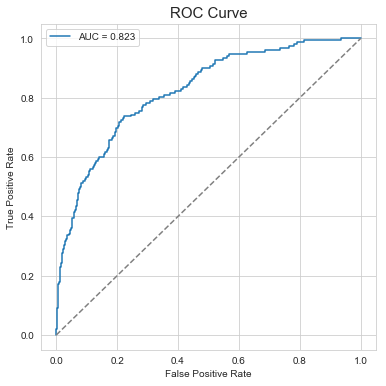

In [66]:
fpr, tpr, tr = roc_curve(y_test, y_test_proba)
auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()

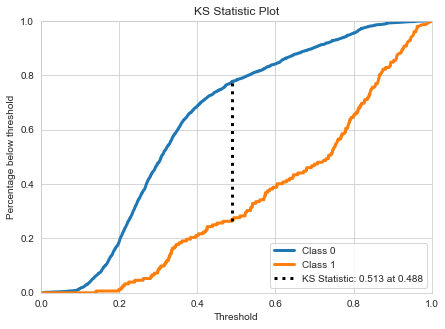

In [67]:
import scikitplot as skplt
y_pred_proba = lr_tuning.predict_proba(x_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(7,5));

min_samples_split: 2; train: 1.0; test: 0.608
min_samples_split: 4; train: 0.934; test: 0.618
min_samples_split: 7; train: 0.879; test: 0.61
min_samples_split: 10; train: 0.836; test: 0.613
min_samples_split: 13; train: 0.818; test: 0.622
min_samples_split: 16; train: 0.783; test: 0.622
min_samples_split: 19; train: 0.769; test: 0.612
min_samples_split: 22; train: 0.761; test: 0.629
min_samples_split: 25; train: 0.757; test: 0.62
min_samples_split: 27; train: 0.736; test: 0.634
min_samples_split: 30; train: 0.73; test: 0.628
min_samples_split: 33; train: 0.718; test: 0.629
min_samples_split: 36; train: 0.721; test: 0.637
min_samples_split: 39; train: 0.711; test: 0.635
min_samples_split: 42; train: 0.71; test: 0.638
min_samples_split: 45; train: 0.706; test: 0.636
min_samples_split: 48; train: 0.699; test: 0.631
min_samples_split: 51; train: 0.688; test: 0.631
min_samples_split: 53; train: 0.685; test: 0.632
min_samples_split: 56; train: 0.691; test: 0.635
min_samples_split: 59; train:

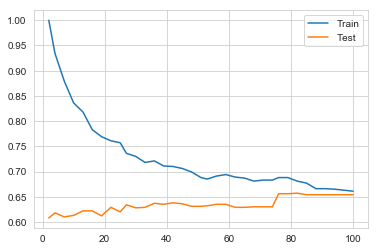

In [68]:
#Training Decision Tree
from sklearn.tree import DecisionTreeClassifier

#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion

train_score = []
test_score = []

for x in values :
    model_dt_tunned = DecisionTreeClassifier(min_samples_split=x, 
                                             random_state=123)
    model_dt_tunned.fit(x_smote,y_smote)
    
    # eval on train
    y_pred_train_dt = model_dt_tunned.predict(x_train)
    train_dt = (np.round(roc_auc_score(y_train, y_pred_train_dt),3))
    train_score.append(train_dt)
     # eval on test
    y_pred_test_dt = model_dt_tunned.predict(x_test)
    test_dt = (np.round(roc_auc_score(y_test, y_pred_test_dt),3))
    test_score.append(test_dt)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_dt) + '; test: ' + str(test_dt))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

min_samples_leaf: 1; train: 0.73; test: 0.628
min_samples_leaf: 2; train: 0.701; test: 0.617
min_samples_leaf: 4; train: 0.69; test: 0.622
min_samples_leaf: 5; train: 0.695; test: 0.628
min_samples_leaf: 7; train: 0.689; test: 0.633
min_samples_leaf: 9; train: 0.684; test: 0.627
min_samples_leaf: 10; train: 0.679; test: 0.628
min_samples_leaf: 12; train: 0.657; test: 0.624
min_samples_leaf: 14; train: 0.667; test: 0.624
min_samples_leaf: 15; train: 0.664; test: 0.626
min_samples_leaf: 17; train: 0.67; test: 0.627
min_samples_leaf: 18; train: 0.664; test: 0.625
min_samples_leaf: 20; train: 0.66; test: 0.626
min_samples_leaf: 22; train: 0.664; test: 0.632
min_samples_leaf: 23; train: 0.66; test: 0.633
min_samples_leaf: 25; train: 0.656; test: 0.628
min_samples_leaf: 27; train: 0.65; test: 0.623
min_samples_leaf: 28; train: 0.648; test: 0.628
min_samples_leaf: 30; train: 0.654; test: 0.634
min_samples_leaf: 31; train: 0.672; test: 0.65
min_samples_leaf: 33; train: 0.672; test: 0.65
min_sa

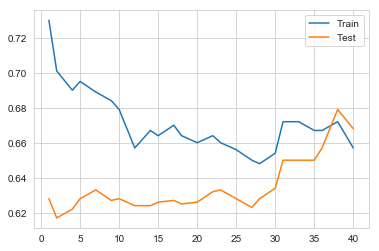

In [69]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion

train_score = []
test_score = []
for x in values :
    model_dt_tunned = DecisionTreeClassifier(min_samples_split=30,
                                             min_samples_leaf=x,
                                             random_state=123)
    model_dt_tunned.fit(x_smote,y_smote)
    
    # eval on train
    y_pred_train_dt = model_dt_tunned.predict(x_train)
    train_dt = (np.round(roc_auc_score(y_train, y_pred_train_dt),3))
    train_score.append(train_dt)
    
    # eval on test
    y_pred_test_dt = model_dt_tunned.predict(x_test)
    test_dt = (np.round(roc_auc_score(y_test, y_pred_test_dt),3))
    test_score.append(test_dt)
    
    print('min_samples_leaf: ' + str(x) + '; train: ' + str(train_dt) + '; test: ' + str(test_dt))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

max_depth: 1; train: 0.648; test: 0.674
max_depth: 2; train: 0.707; test: 0.727
max_depth: 3; train: 0.652; test: 0.7
max_depth: 4; train: 0.652; test: 0.695
max_depth: 5; train: 0.684; test: 0.735
max_depth: 6; train: 0.63; test: 0.639
max_depth: 7; train: 0.651; test: 0.657
max_depth: 8; train: 0.645; test: 0.631
max_depth: 9; train: 0.651; test: 0.63
max_depth: 10; train: 0.653; test: 0.629
max_depth: 11; train: 0.657; test: 0.629
max_depth: 12; train: 0.66; test: 0.626
max_depth: 13; train: 0.66; test: 0.626
max_depth: 14; train: 0.66; test: 0.626
max_depth: 15; train: 0.66; test: 0.626
max_depth: 16; train: 0.66; test: 0.626
max_depth: 17; train: 0.66; test: 0.626
max_depth: 18; train: 0.66; test: 0.626
max_depth: 19; train: 0.66; test: 0.626
max_depth: 20; train: 0.66; test: 0.626
max_depth: 21; train: 0.66; test: 0.626
max_depth: 22; train: 0.66; test: 0.626
max_depth: 23; train: 0.66; test: 0.626
max_depth: 24; train: 0.66; test: 0.626
max_depth: 25; train: 0.66; test: 0.626
ma

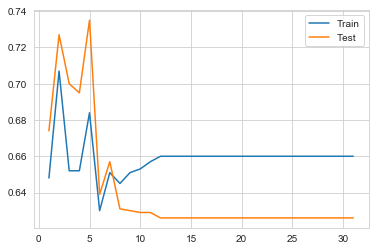

In [70]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion

train_score = []
test_score = []

for x in values :
    model_dt_tunned = DecisionTreeClassifier(min_samples_split=30,
                                             min_samples_leaf=20,
                                             max_depth=x,
                                             random_state=123)
    model_dt_tunned.fit(x_smote,y_smote)
    
    # eval on train
    y_pred_train_dt = model_dt_tunned.predict(x_train)
    train_dt = (np.round(roc_auc_score(y_train, y_pred_train_dt),3))
    train_score.append(train_dt)
    # eval on test
    y_pred_test_dt = model_dt_tunned.predict(x_test)
    test_dt = (np.round(roc_auc_score(y_test, y_pred_test_dt),3))
    test_score.append(test_dt)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_dt) + '; test: ' + str(test_dt))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

In [71]:
#Decision Tree Classifier
model_dt_tunned = DecisionTreeClassifier(min_samples_split=30,
                                             min_samples_leaf=20,
                                             max_depth=5,
                                             random_state=123)
model_dt_tunned.fit(x_smote,y_smote)
    
# eval on train
y_pred_train_dt = model_dt_tunned.predict(x_train)
train_dt = (np.round(roc_auc_score(y_train, y_pred_train_dt),3))

# eval on test
y_pred_test_dt = model_dt_tunned.predict(x_test)
test_dt = (np.round(roc_auc_score(y_test, y_pred_test_dt),3))
    
print('AUC Train', train_dt)
print('AUC Test', test_dt)

AUC Train 0.684
AUC Test 0.735


In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [74]:
%%time
classifier_rf.fit(x_train, y_train)

Wall time: 1.15 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [75]:
# checking the oob score
classifier_rf.oob_score_

0.9346742613029548

In [76]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [77]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [80]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min


Wall time: 2min 36s


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.6min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100, 200], 'n_estimators': [10, 25, 30, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [83]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

In [84]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9352159468438538
